# Project for Data Mining - Smoking Classifier based on Global Coffee Health

## Agampreet Bajaj

## What are we solving?
We are trying to predict wether someone is a smoker or not based on their demographic, lifestyle, and any features related to their health. This problem is very inclusive to the world because of the incredible number of smokers in the world, even though it can cause a lot of damage. Smoking leads to heart disease, cancer, and respiratory issues. If we are able to identify patterns amongst smokers, it can help people or even health organizations understand the factors better. Smoking can cause addiction to nicotine, which can lead to poor sleep, high stress, and less physical activity.

## What is the data?
The data is from [Kaggle](https://www.kaggle.com/datasets/uom190346a/global-coffee-health-dataset) and gives information about Global Coffee Health, including smoking. It provides demographic features (age, gender, country, occupation), lifestyle features (coffee intake, caffeine, sleep, stress, physical activity, alcohol consumption), and health-related features (BMI, heart rate, health issues). The dataset contains 10,000 synthetic records that reflect real-world patterns across 20 countries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("synthetic_coffee_health_10000.csv")
df

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,50,Female,Japan,2.1,199.8,6.0,Fair,30.5,50,Medium,10.1,Moderate,Healthcare,0,1
9996,9997,18,Female,UK,3.4,319.2,5.8,Fair,19.1,71,Medium,11.6,Mild,Service,0,0
9997,9998,26,Male,China,1.6,153.4,7.1,Good,25.1,66,Low,13.7,NaN,Student,1,1
9998,9999,40,Female,Finland,3.4,327.1,7.0,Good,19.3,80,Low,0.1,NaN,Student,0,0


In [3]:
df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


Looking at this spread, we can see the ages range from 18 to 80, which is a good range of ages to look at for smoking issues. 8+ cups of coffee seems like it is way too much, so there might be an outlier near the end of the coffee intake range. A mean of 6.6 hours of sleep seems reasonable, especially in this day and age. This data also takes into account all shapes of people, as the BMI range is 15 to 38. But a drastic thing we can see is that the smoking column shows 20% of examples to be smokers, which means we will have a major class imbalance in non-smokers and smokers.

## Visualizing And Understanding Data

Smoking
0    7996
1    2004
Name: count, dtype: int64


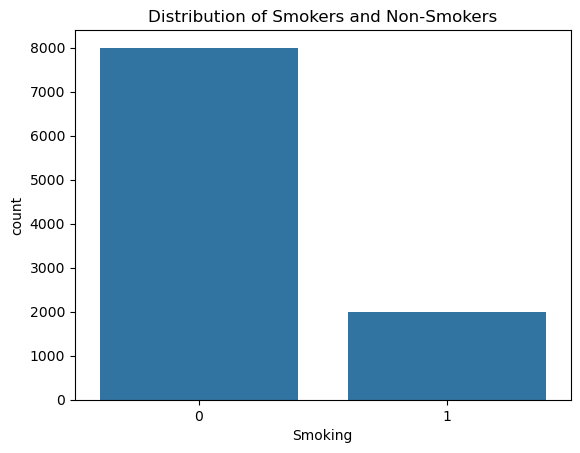

In [4]:
print(df['Smoking'].value_counts())
sns.countplot(df, x='Smoking')
plt.title("Distribution of Smokers and Non-Smokers")
plt.show()

Since there is a big imbalance, we must think of ways to mitigate this, with the last solution to take away examples, as we don't want to waste information that will be significant in our problem. One thing we can immediately understand is the use of other metrics rather than accuracy. This is because our model, with this significant imbalance, can predict training examples to be non-smokers and almost always be right. This means accuracy will always be high and will not be good to base our model on. I will not use SMOTE or downsampling here because I don't want to take data away, and also don't want to make synthetic data that doesn't represent the real data well. I also have 20% of my label as smokers, rather than <5%, where SMOTE because a better option. Therefore, I am going to use logistic regression and random forest as my two classifiers because of their parameter called: <code>class_weight = 'balanced'</code> which will balance classes by adding more weight to the minority class, causing heavier punishments to it. It does this with the formula  $$w_j = \frac{n}{k \times n_j}$$. <br>
wj = weight for class j<br>
n = number of samples<br>
k = number of classes<br>
nj = number of samples in class $$j$$

In [5]:
df.isna().sum()

ID                            0
Age                           0
Gender                        0
Country                       0
Coffee_Intake                 0
Caffeine_mg                   0
Sleep_Hours                   0
Sleep_Quality                 0
BMI                           0
Heart_Rate                    0
Stress_Level                  0
Physical_Activity_Hours       0
Health_Issues              5941
Occupation                    0
Smoking                       0
Alcohol_Consumption           0
dtype: int64

In [6]:
print(df['Health_Issues'].unique())
print("Sum of Non-Null Examples:",df['Health_Issues'].value_counts().sum())

[nan 'Mild' 'Moderate' 'Severe']
Sum of Non-Null Examples: 4059


So we can see that the only null values in our dataset are from the health issues feature. This is very bad, as the amount of null is about 59.41% of the feature, meaning imputation can be extremely risky here. It can give us values that might not make sense, or too many of the same values in many of the examples. Because of this, I printed the unique values that the feature had. I am going to drop this full feature, and let me explain why. We already know the null values are over half the examples, but it is also coarsely binned, meaning it talks about health issues in vague terms. Someone's moderate issue or pain could be someone else's severe. Looking back at the data, we have raw values of someone's BMI, Age, Sleep, alcohol consumption, and more. From this, it is well enough to figure out correlations to smoking, and it seems that the health issues feature is more about issues produced by the person themselves.

In [7]:
df = df.drop(columns=['Health_Issues'])
df.isna().sum()

ID                         0
Age                        0
Gender                     0
Country                    0
Coffee_Intake              0
Caffeine_mg                0
Sleep_Hours                0
Sleep_Quality              0
BMI                        0
Heart_Rate                 0
Stress_Level               0
Physical_Activity_Hours    0
Occupation                 0
Smoking                    0
Alcohol_Consumption        0
dtype: int64

In [8]:
df = df.drop(columns=['Caffeine_mg'])
df.columns

Index(['ID', 'Age', 'Gender', 'Country', 'Coffee_Intake', 'Sleep_Hours',
       'Sleep_Quality', 'BMI', 'Heart_Rate', 'Stress_Level',
       'Physical_Activity_Hours', 'Occupation', 'Smoking',
       'Alcohol_Consumption'],
      dtype='object')

I decided to also drop out caffeine mg as I am going to be looking at coffee intake and caffeine_mg is a linear transformation and is repeating redundant information. 

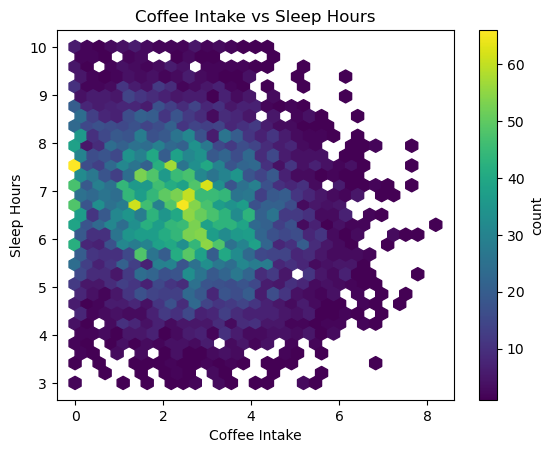

In [9]:
plt.figure()
plt.hexbin(df['Coffee_Intake'], df['Sleep_Hours'], gridsize=30, mincnt=1)
plt.xlabel("Coffee Intake")
plt.ylabel("Sleep Hours")
plt.title("Coffee Intake vs Sleep Hours")
plt.colorbar(label='count')
plt.show()

How a hexagon graph works is it shows the features in an x and y plane, uses colored hexagons showing how many points fall in it. The brighter the color, the more points lie in it. We got a thick cluster at around 1-3 cups and at about 6-8 hours of sleep a day. The coffee intake also has a right tail around 6-8 cups of coffee. This density shows a negative association but it is pretty weak because of the overlap in the amount of points.

In [10]:
cats = ['Alcohol_Consumption', 'Stress_Level', 'Gender', 'Occupation', 'Country', 'Sleep_Quality']

for c in cats:
    rate = df.groupby(c)['Smoking'].mean().sort_values(ascending=False)
    print("Rate of Smoking:", rate, "\n")

Rate of Smoking: Alcohol_Consumption
0    0.203489
1    0.193216
Name: Smoking, dtype: float64 

Rate of Smoking: Stress_Level
Low       0.202175
Medium    0.201951
High      0.184183
Name: Smoking, dtype: float64 

Rate of Smoking: Gender
Female    0.205959
Male      0.195684
Other     0.176991
Name: Smoking, dtype: float64 

Rate of Smoking: Occupation
Student       0.210366
Service       0.204394
Healthcare    0.198065
Office        0.196816
Other         0.192836
Name: Smoking, dtype: float64 

Rate of Smoking: Country
South Korea    0.257812
Sweden         0.235867
Italy          0.223969
India          0.221374
France         0.214429
China          0.209213
Japan          0.206823
Switzerland    0.206000
Norway         0.204589
Australia      0.195171
Netherlands    0.192308
Mexico         0.188406
Finland        0.188235
Germany        0.187123
USA            0.185268
Brazil         0.182018
UK             0.179191
Spain          0.176955
Canada         0.174954
Belgium        

The reason I did this was to show the smoking rate per category for many features. For each category in the feature, we print out the proportion of smokers. We can see that Country feature shows a wide spread, of .17 to .25 while the smoke feature is .2 showing a strong signal across countries. Occupation shows a small variation, .19-.21, showing there could be a modest association with occupation and smoking but not as strong as countries.

## Creating Pipeline and Understanding Process

In [11]:
print(df.dtypes)
print("\nYou can see how we have some categorical data as 'object' and numerical data as 'int64' and 'float64'")

ID                           int64
Age                          int64
Gender                      object
Country                     object
Coffee_Intake              float64
Sleep_Hours                float64
Sleep_Quality               object
BMI                        float64
Heart_Rate                   int64
Stress_Level                object
Physical_Activity_Hours    float64
Occupation                  object
Smoking                      int64
Alcohol_Consumption          int64
dtype: object

You can see how we have some categorical data as 'object' and numerical data as 'int64' and 'float64'


In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=['Smoking', 'ID'])
y = df['Smoking']

cat_col = ['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 'Occupation']
num_col = ['Age', 'Coffee_Intake', 'Sleep_Hours', 'BMI', 'Heart_Rate', 'Physical_Activity_Hours', 'Alcohol_Consumption']

cat_pipeline = Pipeline([
            ('imp', SimpleImputer(strategy='most_frequent')),
            ('oh', OneHotEncoder(handle_unknown='ignore', drop=None))])

num_pipeline_logisticReg = Pipeline([
            ('imp', SimpleImputer(strategy='median')),
            ('sc', StandardScaler())])

num_pipeline_randomF = Pipeline([
            ('imp', SimpleImputer(strategy='median'))])

logistic_columns = ColumnTransformer([
            ('num', num_pipeline_logisticReg, num_col),
            ('cat', cat_pipeline, cat_col)])

random_columns = ColumnTransformer([
            ('num', num_pipeline_randomF, num_col),
            ('cat', cat_pipeline, cat_col)])

logistic_pipeline = Pipeline([
            ('beforeCol', logistic_columns),
            ('logistic', LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42))])

random_pipeline = Pipeline([
            ('beforeCol', random_columns),
            ('random', RandomForestClassifier(class_weight='balanced', n_estimators=400, random_state=42, n_jobs=-1))])

Let's understand and break down what is happening here. I created 2 different pipelines in this code, one for categorical, and one for numerical values. My X (features) does not inlcude our label and it also does not include ID, as it is not a feature but just a column that shows row numbers. I then made 2 different lists, one for categorical and one for numerical features. This is done so we can create the 2 pipelines and allows us to seperate data types as they have different ways of working. I used a One Hot Encoder on categorical variables, which changes them to numerical so they can be read my models.I also impute values by their most frequent usage. For numerical values, I impute by the median and normalize the outputs with a standard scaler. What is important to note is I do not use a scaler for random forest as forest based models don't use feature scaling but use value thresholds to split on. I then used column transformer which allows me to apply each pipeline for specific columns (categorical and numerical). As said before, we use balanced weight class for both models, allowing for a bigger penalty on our imbalanced dataset.

## Train and Test No Tune

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

logistic_pipeline.fit(X_train, y_train)
random_pipeline.fit(X_train, y_train)

Pipeline(steps=[('beforeCol',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Age', 'Coffee_Intake',
                                                   'Sleep_Hours', 'BMI',
                                                   'Heart_Rate',
                                                   'Physical_Activity_Hours',
                                                   'Alcohol_Consumption']),
                                                 ('cat',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oh',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Country',
                                                   'Sleep_Quality',
                                                   'Stress_Level',
                                                   'Occupation'])])),
                ('random',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=400, n_jobs=-1,
                                        random_state=42))])

In [17]:
from sklearn.metrics import roc_auc_score, f1_score, average_precision_score, confusion_matrix

def evaluate_model(X_test, y_test, pipelines, modelName):
    y_class_prediction = pipelines.predict(X_test)
    y_prediction_probability = pipelines.predict_proba(X_test)[:,1]
    print(modelName)
    print("F1 Score: ", f1_score(y_test, y_class_prediction))
    print("Average Precision Score: ", average_precision_score(y_test, y_prediction_probability))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_prediction_probability))
    print("Confusion Matrix: ", confusion_matrix(y_test, y_class_prediction), "\n")

evaluate_model(X_test, y_test, logistic_pipeline, "Logistic Base Model")
evaluate_model(X_test, y_test, random_pipeline, "Random Forest Base Model")

Logistic Base Model
F1 Score:  0.2745411013567438
Average Precision Score:  0.20788922560649667
ROC-AUC Score: 0.5068785197731126
Confusion Matrix:  [[919 680]
 [229 172]] 

Random Forest Base Model
F1 Score:  0.0
Average Precision Score:  0.19424628380388081
ROC-AUC Score: 0.47557700495478
Confusion Matrix:  [[1599    0]
 [ 401    0]] 



These base scores are not looking so good. We can see that the ROC AUC Score for both is either 0.5 or below, meaning the logistic base model is no better than randomly guessing. The random forest one is even worse, showing that without fine-tuning, these models are not predicting well. The average precision score is 0.2 for logistic regression and 0.19 for random forest, showing how horrible the precision is over recall in our models.

## Gridsearch for Tuning Best Params

In [15]:
from sklearn.model_selection import GridSearchCV

logistic_grid = {
    'logistic__penalty': ['l2'],
    'logistic__C': np.logspace(-2, 0.7, 6),
    'logistic__solver': ['liblinear']
}

grid_logistic = GridSearchCV(
    logistic_pipeline, logistic_grid, scoring='f1',
    cv=3, verbose=2
)

grid_logistic.fit(X_train, y_train)

print('Best LOGIT params:', grid_logistic.best_params_, ' | CV F1:', grid_logistic.best_score_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END logistic__C=0.01, logistic__penalty=l2, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.01, logistic__penalty=l2, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.01, logistic__penalty=l2, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.034673685045253165, logistic__penalty=l2, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.034673685045253165, logistic__penalty=l2, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.034673685045253165, logistic__penalty=l2, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.12022644346174131, logistic__penalty=l2, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.12022644346174131, logistic__penalty=l2, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.12022644346174131, logistic__penalty=l2, logistic__solver=liblinear; to

After learning the base model stats, we used some new parameters to find the best one for our model. Our new F1 score is slightly better than our base model. Comparing 0.29 to 0.2. We can also see that the best C value was 1.4 for this model. This means a penalty of 1.4 was best for our classification model.

In [16]:
random_grid = {
    'random__n_estimators': [200,300],
    'random__max_depth': [None, 10, 20, 30, 50],
    'random__min_samples_split': [2,5],
    'random__min_samples_leaf': [1,2],
    'random__max_features': ['sqrt']
}

grid_random = GridSearchCV(
    random_pipeline, random_grid, scoring='f1',
    cv=3, verbose=2
)

grid_random.fit(X_train, y_train)
print('Best RF params:',    grid_random.best_params_,    ' | CV F1:', grid_random.best_score_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] END random__max_depth=None, random__max_features=sqrt, random__min_samples_leaf=1, random__min_samples_split=2, random__n_estimators=200; total time=   2.1s
[CV] END random__max_depth=None, random__max_features=sqrt, random__min_samples_leaf=1, random__min_samples_split=2, random__n_estimators=200; total time=   2.0s
[CV] END random__max_depth=None, random__max_features=sqrt, random__min_samples_leaf=1, random__min_samples_split=2, random__n_estimators=200; total time=   2.0s
[CV] END random__max_depth=None, random__max_features=sqrt, random__min_samples_leaf=1, random__min_samples_split=2, random__n_estimators=300; total time=   3.0s
[CV] END random__max_depth=None, random__max_features=sqrt, random__min_samples_leaf=1, random__min_samples_split=2, random__n_estimators=300; total time=   2.9s
[CV] END random__max_depth=None, random__max_features=sqrt, random__min_samples_leaf=1, random__min_samples_split=2, random__n_e

After seeing how bad the random forest base stats are, we used some new parameters to see what the best was. We found that the random sample leaves were 2, the random sample split was 5, and the random estimator was 200. The best max depth was the lowest at 10, and with a tuned model, we saw a rise in F1 score from 0 to 0.159, but still worse than logistic regression.

## Understanding Where to Go
I have decided to stop moving forward with random forest, especially with the reason of its not performing well, even after the grid search tuning. To make sure we understand, I will explain some things. Random Forest uses purity formulas such as Gini or entropy to find the best place to split the data, and it is worse when we one-hot encode many categories. This is because it increases sparsity and dimensionality as more categories are added to the dataset, and it lowers the information gain from each split, as now you are using up more steps to split 3 categories that used to be one feature (one split), for example. Logistic Regression needs one-hot encoding because it allows the model to handle categorical information as numbers. We see this after our grid search; we get a better F1 score. Now, let's continue with logistic regression and see how much we can push this. I will not be using accuracy here because our dataset has a bad imbalance for the target variable, and it would give us false information.